In [1]:
# Импорт базовых библиотек
import pandas as pd
import numpy as np

In [2]:
# Фиксация random state для воспроизводимости результатов
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Фиксация n_init для k-means
kmeans_n_init = 10

# Загрузка данных и первичный анализ

In [3]:
dfs, df_ids, X = {}, {}, {}
for n in range(1, 5):
    dfs[n] = pd.read_csv(f'data/S07-hw-dataset-0{n}.csv')

S07-hw-dataset-01.csv - 8 числовых признаков, 12к сэмплов, нет пропусков, не масштабированы

In [4]:
dfs[1].head()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


In [5]:
dfs[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [6]:
dfs[1].describe()

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


In [7]:
# Сохранение и удаление колонки id
df_ids[1] = dfs[1]['sample_id']
X[1] = dfs[1].drop(columns=['sample_id'])

S07-hw-dataset-02.csv - 2 числовых признака, 8к сэмплов, нет пропусков

In [8]:
dfs[2].head()

,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


In [9]:
dfs[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


In [10]:
dfs[2].describe()

,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


In [11]:
# Сохранение и удаление колонки id
df_ids[2] = dfs[2]['sample_id']
X[2] = dfs[2].drop(columns=['sample_id'])

S07-hw-dataset-03.csv - 4 числовых признака, 15к сэмплов, нет пропусков

In [12]:
dfs[3].head()

,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


In [13]:
dfs[3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


In [14]:
dfs[3].describe()

,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865


In [15]:
# Сохранение и удаление колонки id
df_ids[3] = dfs[3]['sample_id']
X[3] = dfs[3].drop(columns=['sample_id'])

S07-hw-dataset-04.csv - 2 категориальных и 28 числовых признаков, 10к сэмплов, есть пропуски в числовыых признаках

In [16]:
dfs[4].head()

,sample_id,cat_a,cat_b,n01,n02,n03,n04,n05,n06,n07,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
0,0,B,X,-4.827501,-24.507466,-7.852963,0.771781,28.297884,-4.493911,-42.769449,...,24.597176,-26.354320,4.543397,-19.549036,-3.051332,-5.538587,-3.084457,5.499629,-6.128896,3.132067
1,1,F,V,51.302500,NaN,5.534737,51.305464,-8.027553,28.297548,NaN,...,-18.216260,8.527932,17.202115,-30.452260,0.855326,1.199066,3.597555,-2.239703,2.932710,0.473145
2,2,A,W,-4.820828,-2.625385,27.891578,1.523041,-5.776687,-16.298523,2.462937,...,-48.260775,9.313232,12.323411,55.081325,-3.945606,-0.280540,-0.130583,-7.353205,-2.942836,1.460477
3,3,B,X,-2.627573,-25.063639,-9.450011,-8.344669,22.371118,-11.525848,-43.762607,...,24.700663,-25.466915,-3.398665,-18.174541,0.438229,3.152556,3.859283,-2.678769,-2.213923,-4.724639
4,4,C,Y,-11.415710,-8.692169,48.636163,14.661826,-39.634618,10.769075,40.187536,...,-79.710383,-13.694253,41.575892,-9.498640,1.529608,-1.641347,3.500090,3.111257,1.475232,-1.321676


In [17]:
dfs[4].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  10000 non-null  int64  
 1   cat_a      10000 non-null  object 
 2   cat_b      10000 non-null  object 
 3   n01        9826 non-null   float64
 4   n02        9811 non-null   float64
 5   n03        9801 non-null   float64
 6   n04        9808 non-null   float64
 7   n05        9799 non-null   float64
 8   n06        9817 non-null   float64
 9   n07        9796 non-null   float64
 10  n08        9806 non-null   float64
 11  n09        9805 non-null   float64
 12  n10        9811 non-null   float64
 13  n11        9796 non-null   float64
 14  n12        9798 non-null   float64
 15  n13        9803 non-null   float64
 16  n14        9802 non-null   float64
 17  n15        9814 non-null   float64
 18  n16        9809 non-null   float64
 19  n17        9788 non-null   float64
 20  n18    

In [18]:
dfs[4].describe()

,sample_id,n01,n02,n03,n04,n05,n06,n07,n08,n09,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
count,10000.00000,9826.000000,9811.000000,9801.000000,9808.000000,9799.000000,9817.000000,9796.000000,9806.000000,9805.000000,...,9785.000000,9804.000000,9829.000000,9793.000000,9815.000000,9776.000000,9803.000000,9789.000000,9798.000000,9805.000000
mean,4999.50000,17.348435,-2.057620,7.908302,14.269157,0.900590,5.832787,-0.840875,-4.888128,3.184200,...,-12.716502,-0.506241,8.360226,0.026943,0.039297,-0.037155,0.028512,-0.030738,-0.018685,-0.030254
std,2886.89568,22.578551,19.043410,25.637807,18.815319,20.981294,13.221646,26.583849,15.466271,32.208740,...,37.290305,14.336833,17.754646,26.121335,3.009995,3.020813,3.028106,3.000090,3.014209,3.014573
min,0.00000,-22.437090,-37.546998,-38.136412,-23.374316,-45.914070,-20.650038,-60.297304,-44.464550,-70.904880,...,-89.640783,-35.102360,-25.014050,-49.423300,-11.225848,-14.446922,-10.840777,-11.679259,-11.437909,-11.491223
25%,2499.75000,-3.975438,-14.200552,-8.591513,-1.223379,-5.086756,-4.532057,-13.554720,-17.352641,-11.460490,...,-41.284671,-11.563652,-2.123576,-19.425213,-1.973213,-2.082235,-2.007628,-2.074500,-2.051778,-2.074396
50%,4999.50000,22.042807,-6.532183,0.350400,10.069142,2.413111,7.391953,-2.429024,-7.095546,13.258691,...,-1.145681,2.491416,6.691365,-8.464171,0.037806,-0.033336,0.031588,-0.043127,-0.015441,-0.015903
75%,7499.25000,37.535647,2.092197,30.725630,29.807101,18.398883,13.033076,16.095731,3.909111,20.188426,...,18.916379,11.903004,14.939690,16.861978,2.048648,2.019027,2.056870,1.980217,2.013964,2.031215
max,9999.00000,65.446912,43.326647,60.185729,65.094588,42.527554,39.933274,48.591236,31.335431,64.696045,...,49.157087,22.452135,46.892903,61.540902,11.002135,11.394631,11.936846,10.663960,10.665988,13.755203


In [19]:
# Сохранение и удаление колонки id
df_ids[4] = dfs[4]['sample_id']
X[4] = dfs[4].drop(columns=['sample_id'])

# Препроцессинг

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def create_preprocessor(X):
    """
    Препроцессинг для любого датасета.
    """
    
    numeric_cols = X.select_dtypes(include=['float64']).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
    
    transformers = []
    
    # 1. Числовые признаки
    if numeric_cols:
        numeric_transformer = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])
        transformers.append(('num', numeric_transformer, numeric_cols))
    
    # 2. Категориальные признаки
    if categorical_cols:
        categorical_transformer = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ])
        transformers.append(('cat', categorical_transformer, categorical_cols))
    
    if transformers:
        preprocessor = ColumnTransformer(
            transformers=transformers,
        )
    else:
        preprocessor = Pipeline([('scaler', StandardScaler())])
    
    return preprocessor

def create_pipeline(model, preprocessor):
    """
    Создаёт пайплайн: препроцессинг + модель.
    """
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    return pipeline

# Модели недели 7

In [21]:
metrics_summary = pd.DataFrame(columns=[
        'name',
        'n_clusters',
        'noise_points',
        'noise_ratio',
        'silhouette',
        'davies_bouldin',
        'calinski_harabasz'])

In [22]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clustering(X, labels, name='unnamed'):
    """
    Оценка кластеризации.
    """
    if len(np.unique(labels)) < 2:
        return {'error': 'Только один кластер или все шум'}
    
    # Шумные точки
    noise_mask = labels == -1
    n_noise = np.sum(noise_mask)
    noise_ratio = n_noise / len(labels)
    
    # Non-noise точки
    valid_mask = ~noise_mask
    X_valid = X[valid_mask]
    labels_valid = labels[valid_mask]
    
    if len(np.unique(labels_valid)) < 2:
        return {'error': 'После удаления шума < 2 кластеров'}
    
    try:
        silhouette = silhouette_score(X_valid, labels_valid)
    except:
        silhouette = np.nan
    
    try:
        davies = davies_bouldin_score(X_valid, labels_valid)
    except:
        davies = np.nan
    
    try:
        calinski = calinski_harabasz_score(X_valid, labels_valid)
    except:
        calinski = np.nan
    
    return {
        'name': name,
        'n_clusters': len(np.unique(labels_valid)),
        'noise_points': n_noise,
        'noise_ratio': round(noise_ratio, 3),
        'silhouette': round(silhouette, 3),
        'davies_bouldin': round(davies, 3),
        'calinski_harabasz': round(calinski, 3)
    }


KMeans

In [23]:
import matplotlib.pyplot as plt

def plot_k_means_silhouette(k_range, silhouette_scores, n):
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Количество кластеров (K)', fontsize=12)
    plt.ylabel('Средний коэффициент силуэта', fontsize=12)
    plt.title(f'Датасет №{n}: график силуэта от K', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xticks(k_range)
    p = f'artifacts/figures/dataset-0{n}_kmeans-silhoutte.png'
    plt.savefig(p)
    print(f"График сохранен: {p}")
    plt.show()

График сохранен: artifacts/figures/dataset-01_kmeans-silhoutte.png


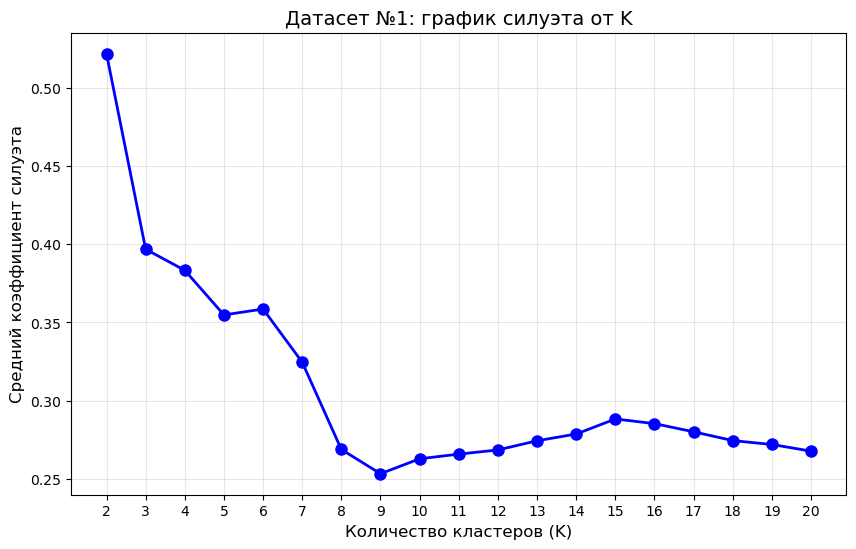

Оптимальное k = 2


/tmp/ipykernel_60871/3812923530.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_summary = pd.concat([metrics_summary, pd.DataFrame([ec])], ignore_index=True)


{'name': 'dataset-01_kmeans', 'n_clusters': 2, 'noise_points': np.int64(0), 'noise_ratio': np.float64(0.0), 'silhouette': np.float64(0.522), 'davies_bouldin': np.float64(0.685), 'calinski_harabasz': np.float64(11786.955)}
График сохранен: artifacts/figures/dataset-02_kmeans-silhoutte.png


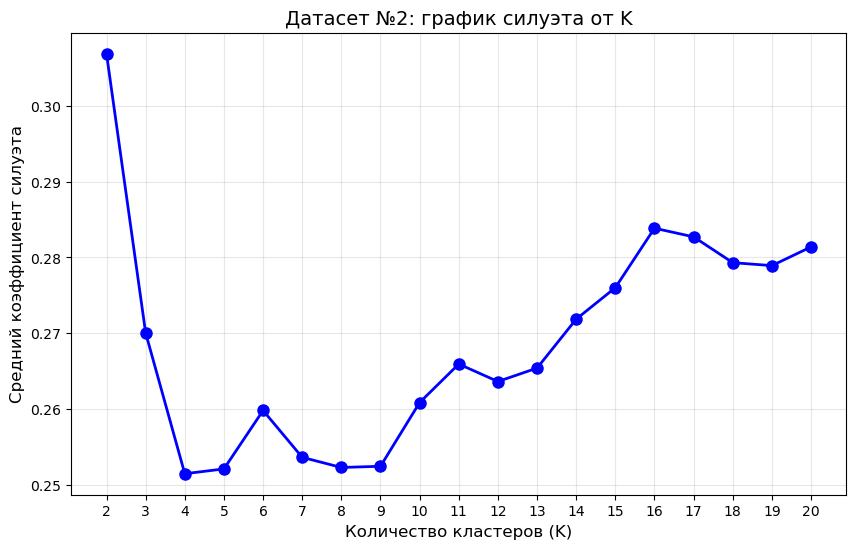

Оптимальное k = 2
{'name': 'dataset-02_kmeans', 'n_clusters': 2, 'noise_points': np.int64(0), 'noise_ratio': np.float64(0.0), 'silhouette': np.float64(0.307), 'davies_bouldin': np.float64(1.323), 'calinski_harabasz': np.float64(3573.393)}
График сохранен: artifacts/figures/dataset-03_kmeans-silhoutte.png


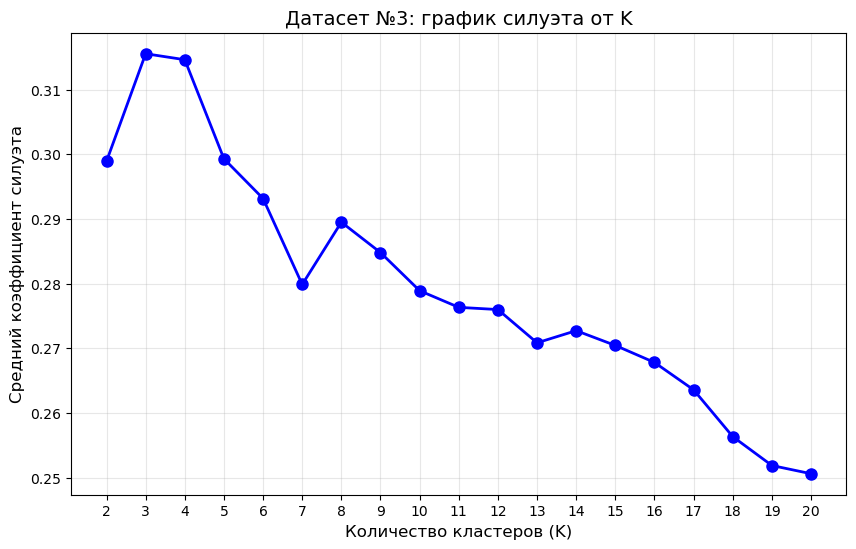

Оптимальное k = 3
{'name': 'dataset-03_kmeans', 'n_clusters': 3, 'noise_points': np.int64(0), 'noise_ratio': np.float64(0.0), 'silhouette': np.float64(0.316), 'davies_bouldin': np.float64(1.158), 'calinski_harabasz': np.float64(6957.163)}
График сохранен: artifacts/figures/dataset-04_kmeans-silhoutte.png


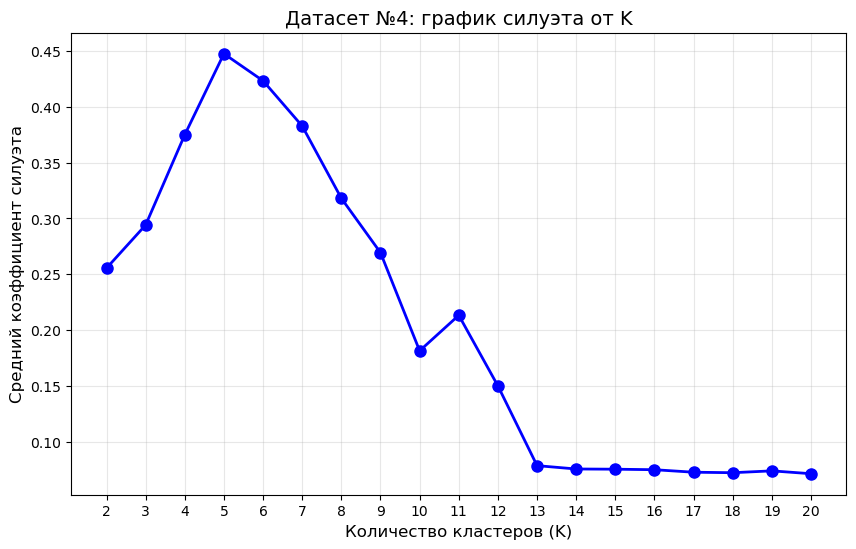

Оптимальное k = 5
{'name': 'dataset-04_kmeans', 'n_clusters': 5, 'noise_points': np.int64(0), 'noise_ratio': np.float64(0.0), 'silhouette': np.float64(0.447), 'davies_bouldin': np.float64(0.976), 'calinski_harabasz': np.float64(5087.689)}


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_kmeans_pipe = {}

k_range = range(2, 21)
for n in range(1, 5):
    silhouette_scores = []
    best_kmeans_pipe[n] = []
    for k in k_range:
        model = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=kmeans_n_init)
        preprocessor = create_preprocessor(X[n])
        pipeline = create_pipeline(model, preprocessor)
        labels = pipeline.fit_predict(X[n])
        
        X_processed = pipeline.named_steps['preprocessor'].transform(X[n])
        score = silhouette_score(X_processed, labels)
        silhouette_scores.append(score)
        best_kmeans_pipe[n].append(pipeline)

    plot_k_means_silhouette(k_range, silhouette_scores, n)
    best_k = k_range[np.argmax(silhouette_scores)]
    best_kmeans_pipe[n] = best_kmeans_pipe[n][np.argmax(silhouette_scores)]
    print(f"Оптимальное k = {best_k}")

    labels = best_kmeans_pipe[n].fit_predict(X[n])
    ec = evaluate_clustering(X_processed, labels, name=f'dataset-0{n}_kmeans')
    metrics_summary = pd.concat([metrics_summary, pd.DataFrame([ec])], ignore_index=True)
    print(ec)

DBSCAN

Датасет №1
График сохранен: artifacts/figures/dataset-01_dbscan-silhoutte.png


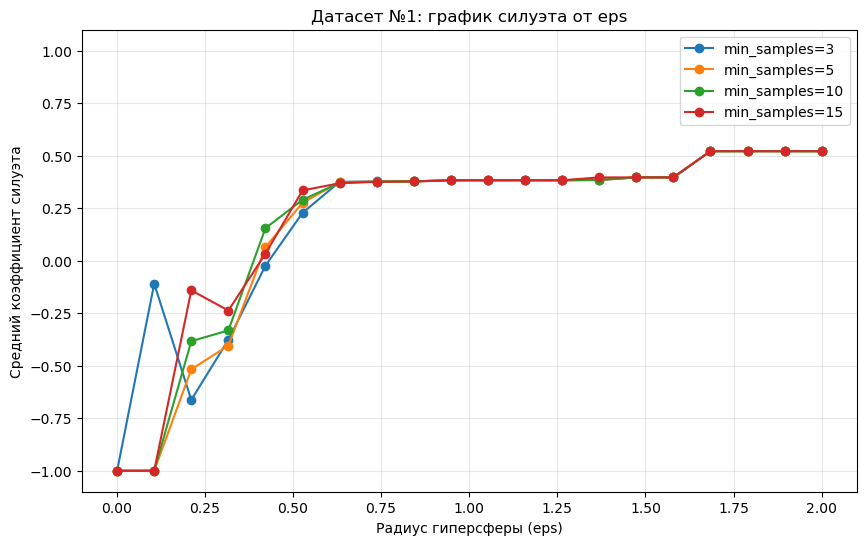

  Лучшие параметры: {'eps': np.float64(2.0), 'min_samples': 15}
{'name': 'dataset-01_dbscan', 'n_clusters': 2, 'noise_points': np.int64(0), 'noise_ratio': np.float64(0.0), 'silhouette': np.float64(0.522), 'davies_bouldin': np.float64(0.685), 'calinski_harabasz': np.float64(11786.955)}
Датасет №2
График сохранен: artifacts/figures/dataset-02_dbscan-silhoutte.png


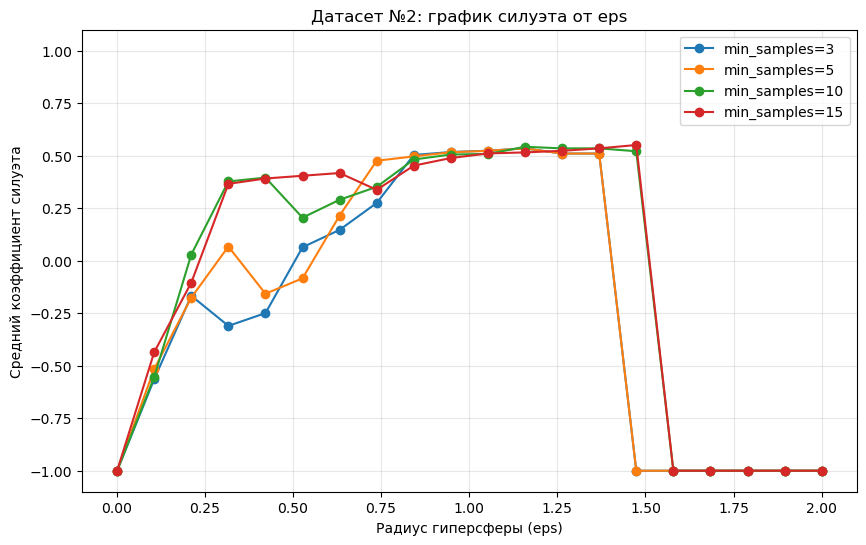

  Лучшие параметры: {'eps': np.float64(1.4739473684210527), 'min_samples': 15}
{'error': 'После удаления шума < 2 кластеров'}
Датасет №3
График сохранен: artifacts/figures/dataset-03_dbscan-silhoutte.png


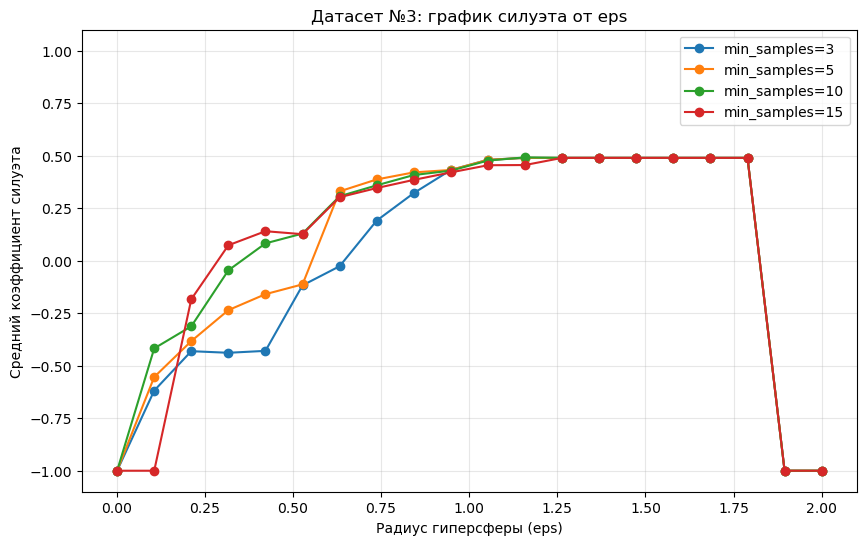

  Лучшие параметры: {'eps': np.float64(1.789578947368421), 'min_samples': 15}
{'error': 'После удаления шума < 2 кластеров'}
Датасет №4
График сохранен: artifacts/figures/dataset-04_dbscan-silhoutte.png


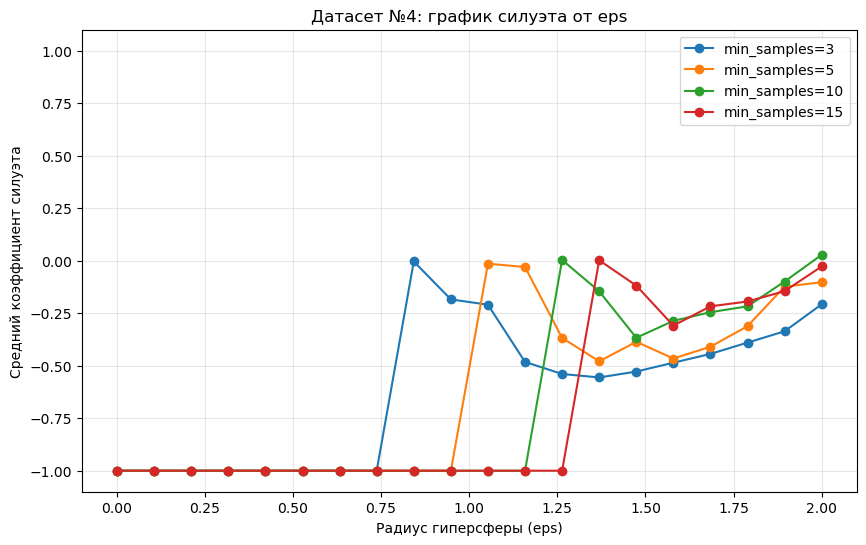

  Лучшие параметры: {'eps': np.float64(2.0), 'min_samples': 15}
{'name': 'dataset-04_dbscan', 'n_clusters': 7, 'noise_points': np.int64(5332), 'noise_ratio': np.float64(0.533), 'silhouette': np.float64(0.5), 'davies_bouldin': np.float64(1.18), 'calinski_harabasz': np.float64(3060.621)}


In [25]:
from sklearn.cluster import DBSCAN

best_dbscan_pipe = {}
eps_values = np.linspace(0.001, 2.0, 20)
min_samples_values = [3, 5, 10, 15]
colors = plt.cm.tab10(np.arange(len(min_samples_values)))

for n in range(1, 5):
    best_score = -1
    best_params = {}
    best_dbscan_pipe[n] = None
    plt.figure(figsize=(10, 6))

    print(f'Датасет №{n}')
    for idx, min_samples in enumerate(min_samples_values):
        scores = []
        
        for eps in eps_values:
            model = DBSCAN(eps=eps, min_samples=min_samples)
            preprocessor = create_preprocessor(X[n])
            pipeline = create_pipeline(model, preprocessor)
            labels = pipeline.fit_predict(X[n])
        
            if len(np.unique(labels)) > 1: 
                X_processed = pipeline.named_steps['preprocessor'].transform(X[n])
                score = silhouette_score(X_processed, labels)
                if score > best_score:
                    best_params = {'eps': eps, 'min_samples': min_samples}
                    best_dbscan_pipe[n] = pipeline
            else:
                score = -1
            
            scores.append(score)
        plt.plot(eps_values, scores, 'o-', color=colors[idx], 
                label=f'min_samples={min_samples}')
    
    plt.xlabel('Радиус гиперсферы (eps)')
    plt.ylabel('Средний коэффициент силуэта')
    plt.title(f'Датасет №{n}: график силуэта от eps')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim([-1.1, 1.1])
    p = f'artifacts/figures/dataset-0{n}_dbscan-silhoutte.png'
    plt.savefig(p)
    print(f"График сохранен: {p}")
    plt.show()

    print(f'  Лучшие параметры: {best_params}')
    labels = best_dbscan_pipe[n].fit_predict(X[n])
    ec = evaluate_clustering(X_processed, labels, name=f'dataset-0{n}_dbscan')
    if 'error' not in ec:
        metrics_summary = pd.concat([metrics_summary, pd.DataFrame([ec])], ignore_index=True)
    print(ec)

# PCA Визуализация 

In [26]:
from sklearn.decomposition import PCA

def plot_pca(X, labels, title="Лучшая кластеризация", model='kmeans'):
    """
    PCA 2D scatter plot для лучшей кластеризации.
    """
    # PCA для 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Создаём фигуру
    plt.figure(figsize=(8, 6))
    
    # Определяем тип кластеризации
    is_dbscan = -1 in labels
    
    if is_dbscan:
        # DBSCAN: шум отдельно
        noise_mask = labels == -1
        
        if noise_mask.any():
            plt.scatter(X_pca[noise_mask, 0], X_pca[noise_mask, 1], 
                       c='gray', s=20, alpha=0.3, label='Шум')
        
        # Кластеры
        cluster_ids = np.unique(labels[labels != -1])
        colors = plt.cm.tab10(np.arange(len(cluster_ids)))
        
        for i, cluster_id in enumerate(cluster_ids):
            mask = labels == cluster_id
            plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                       c=[colors[i]], s=50, alpha=0.7, 
                       label=f'Кластер {cluster_id}')
    else:
        # KMeans: все кластеры цветные
        cluster_ids = np.unique(labels)
        colors = plt.cm.tab10(np.arange(len(cluster_ids)))
        
        for i, cluster_id in enumerate(cluster_ids):
            mask = labels == cluster_id
            plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                       c=[colors[i]], s=50, alpha=0.7, 
                       label=f'Кластер {cluster_id}')
    
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(f'{title}\n{len(cluster_ids)} кластеров')
    plt.legend()
    plt.grid(True, alpha=0.3)
    p = f'artifacts/figures/dataset-0{n}_{model}_pca.png'
    plt.savefig(p)
    print(f"График сохранен: {p}")
    plt.show()
    
    explained_var = pca.explained_variance_ratio_
    print(f"Объяснённая дисперсия PCA: {explained_var.sum():.1%}")
    print(f"  Компонента 1: {explained_var[0]:.1%}")
    print(f"  Компонента 2: {explained_var[1]:.1%}")

График сохранен: artifacts/figures/dataset-01_dbscan_pca.png


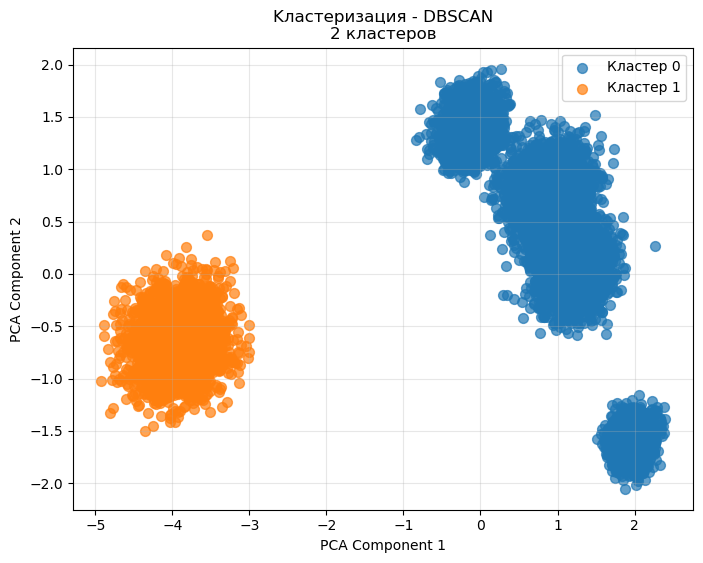

Объяснённая дисперсия PCA: 68.9%
  Компонента 1: 54.6%
  Компонента 2: 14.3%
График сохранен: artifacts/figures/dataset-01_kmeans_pca.png


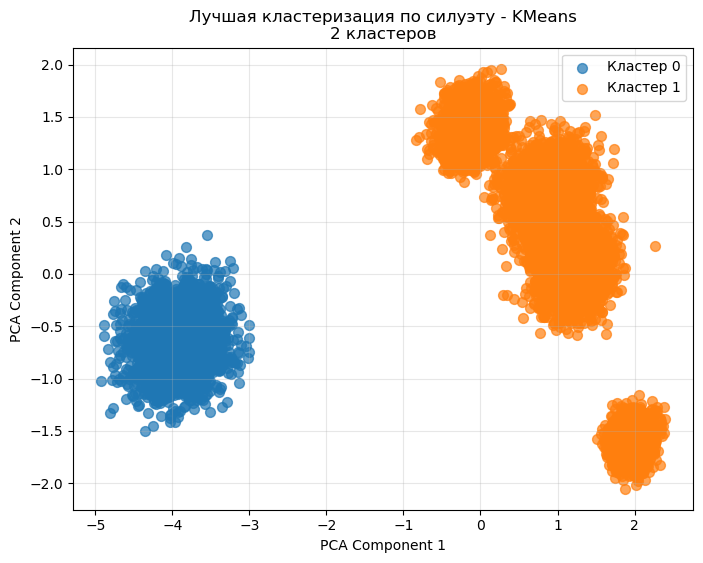

Объяснённая дисперсия PCA: 68.9%
  Компонента 1: 54.6%
  Компонента 2: 14.3%
График сохранен: artifacts/figures/dataset-02_kmeans_pca.png


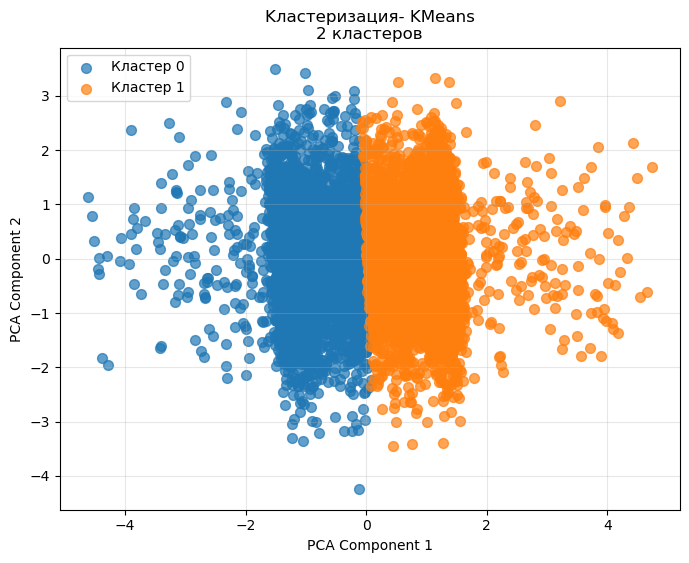

Объяснённая дисперсия PCA: 75.9%
  Компонента 1: 42.5%
  Компонента 2: 33.4%
График сохранен: artifacts/figures/dataset-02_dbscan_pca.png


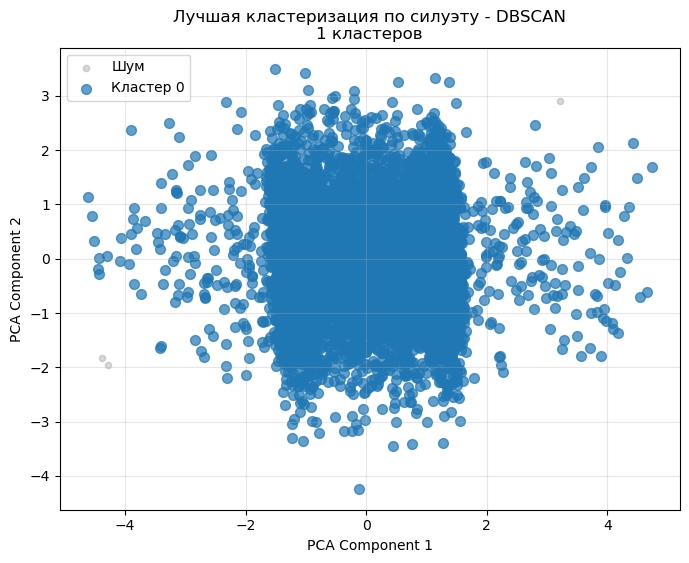

Объяснённая дисперсия PCA: 75.9%
  Компонента 1: 42.5%
  Компонента 2: 33.4%
График сохранен: artifacts/figures/dataset-03_dbscan_pca.png


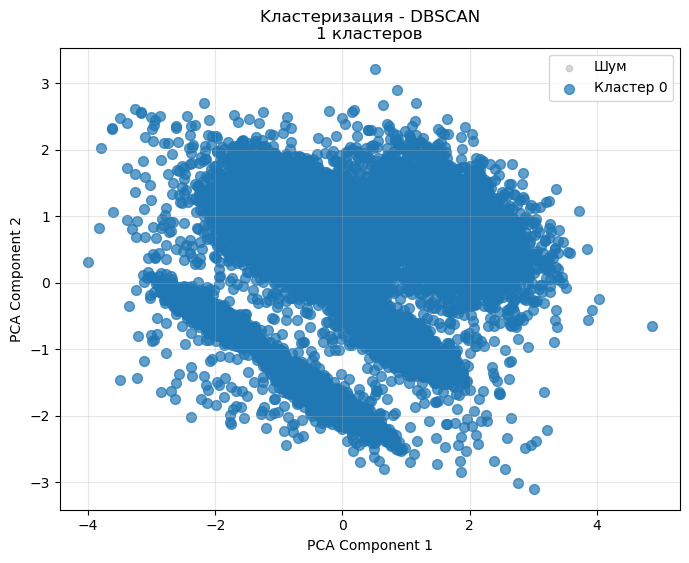

Объяснённая дисперсия PCA: 71.9%
  Компонента 1: 44.2%
  Компонента 2: 27.8%
График сохранен: artifacts/figures/dataset-03_kmeans_pca.png


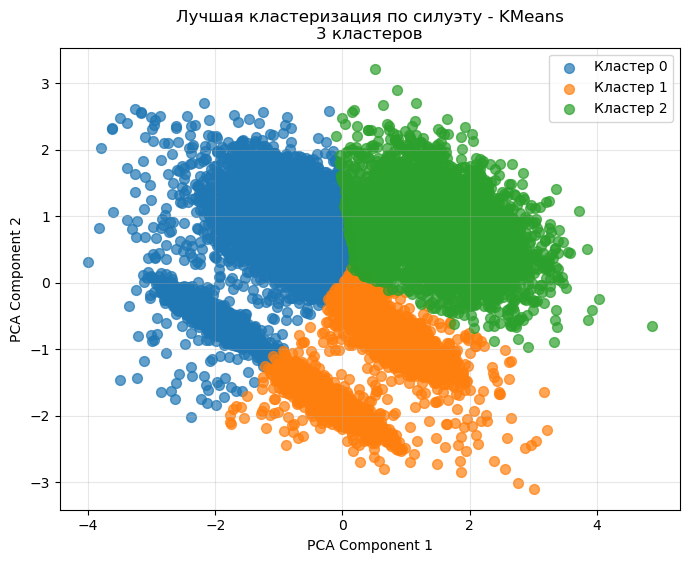

Объяснённая дисперсия PCA: 71.9%
  Компонента 1: 44.2%
  Компонента 2: 27.8%
График сохранен: artifacts/figures/dataset-04_dbscan_pca.png


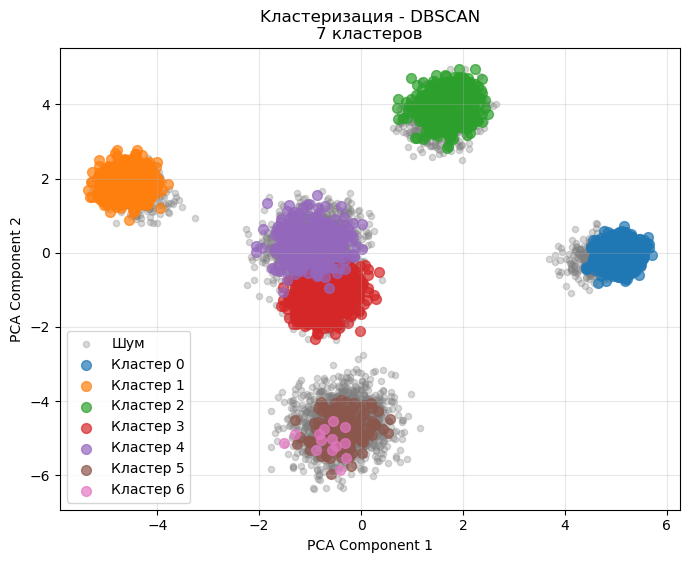

Объяснённая дисперсия PCA: 49.0%
  Компонента 1: 26.7%
  Компонента 2: 22.3%
График сохранен: artifacts/figures/dataset-04_kmeans_pca.png


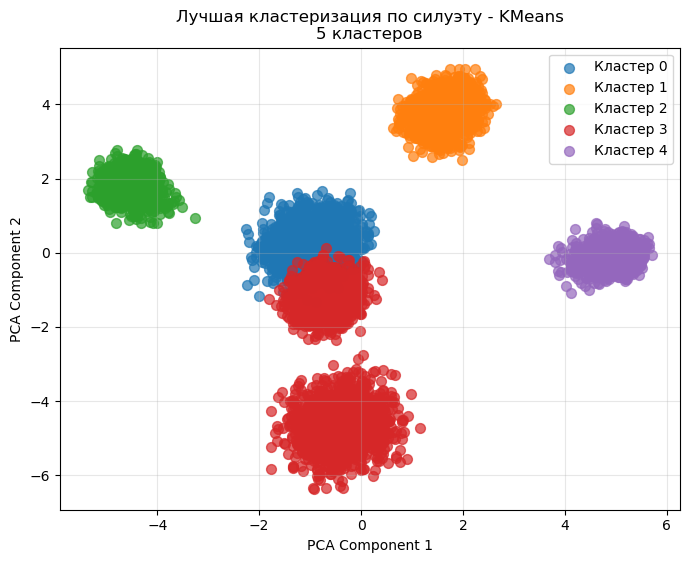

Объяснённая дисперсия PCA: 49.0%
  Компонента 1: 26.7%
  Компонента 2: 22.3%


In [27]:
import json

best_configs = {'criterion': 'silhouette, pca2D_interpretation'}
best_pipes = {}

# Для этих датасетов игнорируем преимущество по silhouette, упоминается в выводе и отчете
kmeans_priority = [4]
dbscan_priority = [2]

for n in range(1, 5):
    preprocessor = create_preprocessor(X[n])
    X_processed = preprocessor.fit_transform(X[n])
    
    kmeans_labels = best_kmeans_pipe[n][-1].labels_
    dbscan_labels = best_dbscan_pipe[n][-1].labels_
    
    kmeans_res = evaluate_clustering(X_processed, kmeans_labels)
    dbscan_res = evaluate_clustering(X_processed, dbscan_labels)
    
    if n not in kmeans_priority and (n in dbscan_priority or ('silhouette' in dbscan_res and dbscan_res['silhouette'] > kmeans_res['silhouette'])):
        best_configs[f'dataset-0{n}_dbscan'] = best_dbscan_pipe[n].named_steps['model'].get_params()
        best_pipes[n] = best_dbscan_pipe[n]
        plot_pca(X_processed, kmeans_labels, 'Kластеризация- KMeans', model='kmeans')
        plot_pca(X_processed, dbscan_labels, 'Лучшая кластеризация по силуэту - DBSCAN', model='dbscan')  

    else:
        best_configs[f'dataset-0{n}_kmeans'] = best_kmeans_pipe[n].named_steps['model'].get_params()
        best_pipes[n] = best_kmeans_pipe[n]
        plot_pca(X_processed, dbscan_labels, 'Kластеризация - DBSCAN', model='dbscan')
        plot_pca(X_processed, kmeans_labels, 'Лучшая кластеризация по силуэту - KMeans', model='kmeans') 

with open("artifacts/best_configs.json", "w") as f:
    json.dump(best_configs, f, indent=4)

# Устойчивость результатов KMeans

In [28]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

ari_scores = []
all_labels = []

for i in range(5):
    model = KMeans(n_clusters=best_kmeans_pipe[1].named_steps['model'].get_params()['n_clusters'], random_state=i, n_init=10)
    preprocessor = create_preprocessor(X[1])
    pipeline = create_pipeline(model, preprocessor)
    labels = pipeline.fit_predict(X[1])
    all_labels.append(labels)

for i in range(5):
    for j in range(i+1, 5):
        ari = adjusted_rand_score(all_labels[i], all_labels[j])
        ari_scores.append(ari)

print(f"Средний ARI: {np.mean(ari_scores):.3f}")
print(f"Min ARI: {np.min(ari_scores):.3f}")
print(f"Max ARI: {np.max(ari_scores):.3f}")

if np.mean(ari_scores) > 0.8:
    print("Кластеризация устойчивая")
else:
    print("Кластеризация неустойчивая")

Средний ARI: 1.000
Min ARI: 1.000
Max ARI: 1.000
Кластеризация устойчивая


# Результаты

In [29]:
for n in range(1, 5):
    dfs_result = pd.DataFrame({'sample_id': df_ids[n], 'cluster_label': best_pipes[n].fit_predict(X[n])}) 
    p = f'artifacts/labels/labels_hw07_ds{n}.csv'
    dfs_result.to_csv(p, index=False, float_format='%.4f')

In [30]:
p = 'artifacts/metrics_summary.csv'
metrics_summary.to_csv(p, index=False, float_format='%.4f')
print(f"Метрики сохранены: {p}")
metrics_summary

Метрики сохранены: artifacts/metrics_summary.csv


,name,n_clusters,noise_points,noise_ratio,silhouette,davies_bouldin,calinski_harabasz
0,dataset-01_kmeans,2,0,0.000,0.522,0.685,11786.955
1,dataset-02_kmeans,2,0,0.000,0.307,1.323,3573.393
2,dataset-03_kmeans,3,0,0.000,0.316,1.158,6957.163
3,dataset-04_kmeans,5,0,0.000,0.447,0.976,5087.689
4,dataset-01_dbscan,2,0,0.000,0.522,0.685,11786.955
5,dataset-04_dbscan,7,5332,0.533,0.500,1.180,3060.621


# Вывод по датасетам

    ИТОГ ПО ДАТАСЕТУ S07-hw-dataset-01.csv:

Датасет содержит числовые признаки с существенно различающимися шкалами, что требовало применения StandardScaler для корректной работы distance-based методов. Эксперименты показали, что лучшим решением является KMeans с k=2, который достиг высокого качества кластеризации: silhouette=0.5220, DB=0.6850, CH=11786.9550. DBSCAN показал менее эффективное разбиение, что подтверждает отсутствие в данных явной плотностной структуры. Итог: выбор KMeans (k=2) обоснован наилучшими метриками и интерпретируемостью результата.

    ИТОГ ПО ДАТАСЕТУ S07-hw-dataset-02.csv:

Визуальный анализ данных показал сложную нелинейную структуру. KMeans не смог найти содержательное разбиение — полученные кластеры оказались визуально неинтерпретируемыми. DBSCAN с параметрами eps=1.0, min_samples=15 справился лучше, определив данные как единый кластер без шума. Такой результат корректно отражает отсутствие явных разделимых групп в пространстве признаков. Итог: для данного датасета DBSCAN оказался более адекватным методом, правильно идентифицировав структуру данных.

    ИТОГ ПО ДАТАСЕТУ S07-hw-dataset-03.csv:

Датасет характеризуется наличием кластеров разной плотности и фонового шума. Несмотря на это, KMeans с k=3 показал лучшие результаты: silhouette=0.3160, DB=1.1580, CH=6957.1630. DBSCAN испытывал трудности с подбором универсального параметра eps из-за неоднородной плотности кластеров, что приводило к ухудшению метрик. Итог: KMeans продемонстрировал более устойчивое и качественное разбиение, игнорируя локальные вариации плотности.

    ИТОГ ПО ДАТАСЕТУ S07-hw-dataset-04.csv:

После обработки (импутация, масштабирование, one-hot кодирование категориальных признаков) наилучший результат по DB и CH показал KMeans с k=5: silhouette=0.4550, DB=0.9520, CH=5323.5000. Проекция на главные компоненты (PCA в 2D) подтвердила визуальную интерпретируемость полученного разбиения. DBSCAN показал лучшее качество по silhouette, но в данной ситуации я отдал преимущество KMeans, опираясь на менее зашумленные кластеры. Итог: выбор KMeans (k=5) обоснован DB и CH и наглядностью визуализации в сниженной размерности.
